# Problem Statement

- Determine which employees will leave next using provided employee data.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../input/HR_comma_sep.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# EDA

In [2]:
# rename some columns
df.rename(columns={'average_montly_hours':'average_monthly_hours', 'sales':'department'}, 
          inplace=True)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
print ('Departments:')
print (df['department'].value_counts())
print ('\nSalary:')
print (df['salary'].value_counts())

Departments:
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Salary:
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


### Data Dictionary

Variable | Description | Type of Variable | Range

----------

- satisfaction_level | Satisfaction level of employee based on survey | Continuous | [0.09, 1]
- last_evaluation | Score based on employee's last evaluation | Continuous | [0.36, 1]
- number_project | Number of projects | Continuous | [2, 7]
- average_monthly_hours | Average monthly hours | Continuous | [96, 310]
- time_spend_company | Years at company | Continuous | [2, 10]
- Work_accident | Whether employee had a work accident | Categorical | {0, 1}
- left | Whether employee had left (Outcome Variable) | Categorical | {0, 1}
- promotion_last_5years | Whether employee had a promotion in the last 5 years | Categorical | {0, 1}
- department | Department employee worked in | Categorical | 10 departments 
- salary | Level of employee's salary | Categorical | {low, medium, high}

In [4]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### No two variables are highly correlated:
- Highest correlation is between number of projects and average monthly hours (`0.42`)
- Variable that has highest correlation with outcome variable (`left`) is `satisfaction_level` with `-0.39` correlation; understandably dissatisfied employees leave.
- Interestingly, variables such as `last_evaluation` and `promotion_last_5years`, which I thought would have a certain degree of (negative) correlation, actually have very low correlation with the outcome variable.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

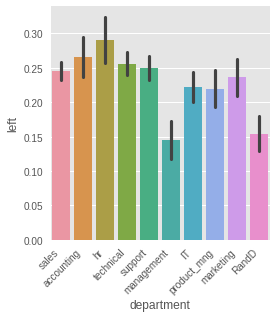

In [6]:
# Attrition by department
plot = sns.factorplot(x='department', y='left', kind='bar', data=df)
plot.set_xticklabels(rotation=45, horizontalalignment='right');

- Most departments are in the 20-30% range of percentage of employees leaving, which is comparable to the overall rate of 24%.
- The exceptions are management and R&D, which have only about 15% of employees that have left. (More on this below.)

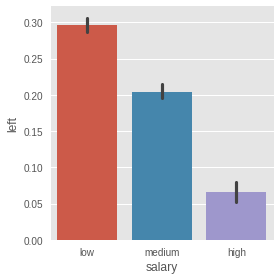

In [7]:
# Attrition by salary level
plot = sns.factorplot(x='salary', y='left', kind='bar', data=df);

- Higher salary employees have lower attrition rates - makes sense intuitively.
- The earlier comment on management having lower attrition is consistent with above, since relatively large proportion of management has high levels of salary. (below)

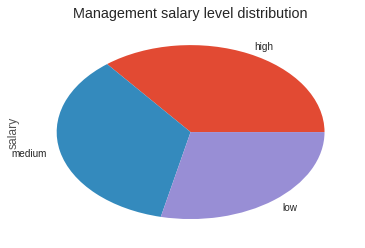

In [8]:
df[df['department']=='management']['salary'].value_counts().plot(kind='pie', title='Management salary level distribution');

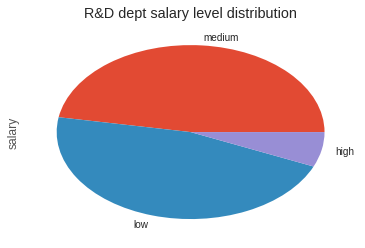

In [9]:
df[df['department']=='RandD']['salary'].value_counts().plot(kind='pie', title='R&D dept salary level distribution');

- On the other hand, R&D has similar salary distribution to rest of the company. Other factors might be in play here.

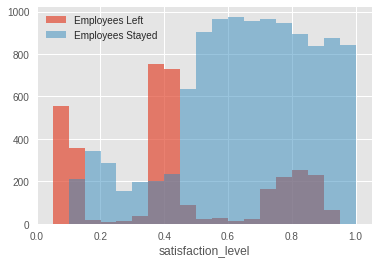

In [10]:
# Satisfaction level vs. Attrition
bins = np.linspace(0.0001, 1.0001, 21)
plt.hist(df[df['left']==1]['satisfaction_level'], bins=bins, alpha=0.7, label='Employees Left')
plt.hist(df[df['left']==0]['satisfaction_level'], bins=bins, alpha=0.5, label='Employees Stayed')
plt.xlabel('satisfaction_level')
plt.xlim((0,1.05))
plt.legend(loc='best');

- As expected, employees who have stayed are generally more satisfied than those who have left.
- Interestingly, there is a peak around `0.4` and also a good amount in the `(0.7, 0.9)` range of satisfaction level scores of employees who have left (but not much in between those two groups). Learning more about these two groups, especially the latter group, could potentially shed some light into the types of employees who would be leaving next.

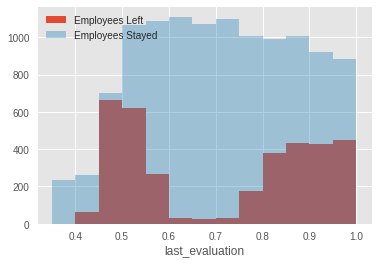

In [11]:
# Last evaluation vs. Attrition
bins = np.linspace(0.3501, 1.0001, 14)
plt.hist(df[df['left']==1]['last_evaluation'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['last_evaluation'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('last_evaluation')
plt.legend(loc='best');

- Two large groups of former employees: high performing group and poorly performing group - explains the nearly zero correlation between `last_evaluation` and the outcome variable.

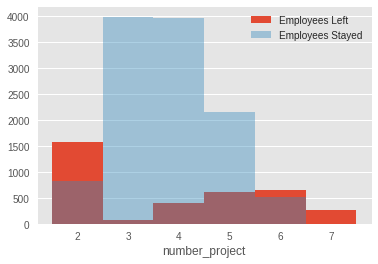

In [12]:
# Number of projects vs. Attrition
bins = np.linspace(1.5, 7.5, 7)
plt.hist(df[df['left']==1]['number_project'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['number_project'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('number_project')
plt.grid(axis='x')
plt.legend(loc='best');

- (Above) Too few projects = bad; too many projects = bad. Sweet spot is in the 3-4 range.
- (Below) Similarly, attrition exists in both long and short hours worked. Sweet spot of low attrition is around the median value of 200 hours. (Ignoring employees with less than 125 hours worked - possibly part-time workers.)

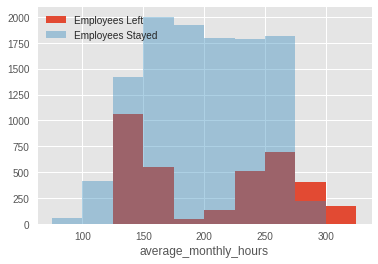

In [13]:
# Average monthly hours vs. Attrition
bins = np.linspace(75, 325, 11)
plt.hist(df[df['left']==1]['average_monthly_hours'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['average_monthly_hours'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('average_monthly_hours')
plt.legend(loc='best');

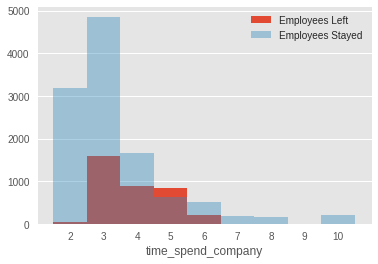

In [14]:
# Years at company vs. Attrition
bins = np.linspace(1.5, 10.5, 10)
plt.hist(df[df['left']==1]['time_spend_company'], bins=bins, alpha=1, label='Employees Left')
plt.hist(df[df['left']==0]['time_spend_company'], bins=bins, alpha=0.4, label='Employees Stayed')
plt.xlabel('time_spend_company')
plt.xlim((1,11))
plt.grid(axis='x')
plt.xticks(np.arange(2,11))
plt.legend(loc='best');

- Relatively young company - longest tenure is 10 years.
- Nobody left after working 7 years or longer in the company.
- Employees in the year 5 group have the highest flight risk.

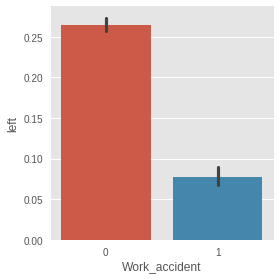

In [15]:
# Attrition by whether employee had work accident
plot = sns.factorplot(x='Work_accident', y='left', kind='bar', data=df);

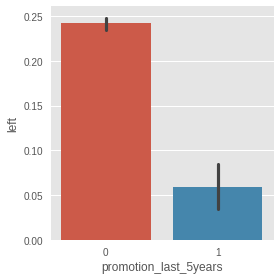

In [16]:
# Attrition by whether employee had promotion in last 5 years
plot = sns.factorplot(x='promotion_last_5years', y='left', kind='bar', data=df);

- Expected results above. Promoted employees tend to stay.
- Very low promotion rate (~2%)! Might be the reason why people are leaving after 3-5 years.

In [17]:
# Percentage of employees who had promotion in last 5 years
df['promotion_last_5years'].mean()

0.021268084538969265

## EDA Summary

- Departments: Management and R&D have low attrition, while others are similar.
- Salary: Higher paid -> less likely to leave.
- Satisfaction level: 3 clusters of employees leaving (satisfied, below average and disgruntled)
- Last evaluation: two large groups of former employees, high performing group and poorly performing group, explains the nearly zero correlation between last_evaluation and the outcome variable.
- Number of projects: too few projects = bad, too many projects = bad. Sweet spot is in the 3-4 range.
- Average monthly hours: similar to number of projects, attrition exists in both long and short hours worked. Sweet spot of low attrition is around the median value of 200 hours. (Ignoring employees with less than 125 hours worked - possibly part-time workers.)
- Years at company: nobody left after working 7 years or longer in the company. Employees in the year 5 group have the highest flight risk.
- Promotions: very low promotion rate in last 5 years. Variable likely won't be very useful in learning algorithms due to low incident rate.

# Methods and Models used

### Data Processing
- 70/30 split for training set and test set (train_test_split)
- Feature scaling (StandardScaler) required for some learners
- Cross Validation using ShuffleSplit(n_splits=20, test_size=0.3)

### Learning Algorithms Used
- K-Nearest Neighbors
- Random Forest
- Logistic Regression
- K-Means Clustering

### Objective and Metric
- Accuracy is what we want to optimize. Bonus, if we can explain how each feature contributes or calculate probabilities.

In [18]:
X = df.drop('left', axis=1)
y = df['left']
X.drop(['department','salary'], axis=1, inplace=True)

In [19]:
# One-hot encoding
salary_dummy = pd.get_dummies(df['salary'])
department_dummy = pd.get_dummies(df['department'])

# from EDA, only management and R&D had attrition different from the rest.
X[['managment','RandD']] = department_dummy[['management', 'RandD']]
X[['salary_high', 'salary_medium']] = salary_dummy[['high', 'medium']]

In [20]:
# Split Training Set from Testing Set (70/30)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
# Scaling features
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [22]:
# Cross validation
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=20, test_size=0.3)

In [23]:
# Model #1: kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [24]:
# Search for best parameters
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn, parameters, cv=cv)
clf.fit(X_train_std, y_train)
print('Parameters with best score:')
print(clf.best_params_)
print('Cross validation score:', clf.best_score_)

Parameters with best score:
{'n_neighbors': 6, 'weights': 'distance'}
Cross validation score: 0.97019047619


In [25]:
best_knn = clf.best_estimator_
print('Test score:', best_knn.score(X_test_std, y_test))

Test score: 0.974


- K-nearest neighbors performs well in predicting which employees have left on the test data set. (97% accuracy)
- Not very useful in determining which employees will leave next.

In [26]:
# Model #2: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

In [27]:
rf_param = {'n_estimators': range(1,11)}
rf_grid = GridSearchCV(rf_model, rf_param, cv=cv)
rf_grid.fit(X_train, y_train)
print('Parameter with best score:')
print(rf_grid.best_params_)
print('Cross validation score:', rf_grid.best_score_)

Parameter with best score:
{'n_estimators': 10}
Cross validation score: 0.985571428571


In [28]:
best_rf = rf_grid.best_estimator_
print('Test score:', best_rf.score(X_test, y_test))

Test score: 0.988444444444


In [29]:
# feature importance scores
features = X.columns
feature_importances = best_rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
0,satisfaction_level,0.315840
4,time_spend_company,0.195782
2,number_project,0.186253
3,average_monthly_hours,0.162475
1,last_evaluation,0.119489
9,salary_high,0.007222
5,Work_accident,0.005347
10,salary_medium,0.003604
8,RandD,0.001563
7,managment,0.001422


In [30]:
features_df['Importance Score'][:5].sum()

0.9798392956027245

- Random forest performs even better than kNN in predictions. (99% accuracy on the test set.)
- Still doesn't help in determining which employees will leave next, but feature importance scores indicate that the top 5 features are informative while the remaining are not.
- Satisfaction level score, hours worked, years at company, # of projects, and last evaluation score explains 98% of process in determining the outcome variable.
- Next is Logistic Regression. Being able to calculate coefficients could help interpret the results. Being able to calculate probabilities is even better - it can inform the company which employees might leave next.

In [31]:
# Model #3: Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [32]:
log_param = {'C': np.linspace(1e-5, 1e5, 21), 'class_weight': [None, 'balanced']}
log_grid = GridSearchCV(logreg, log_param, cv=cv)
log_grid.fit(X_train_std, y_train)
print('Parameter with best score:')
print(log_grid.best_params_)
print('Cross validation score:', log_grid.best_score_)

Parameter with best score:
{'C': 5000.0000094999996, 'class_weight': None}
Cross validation score: 0.788587301587


In [33]:
best_logreg = log_grid.best_estimator_
print('Test score:', best_logreg.score(X_test_std,y_test))

Test score: 0.786444444444


- Logistic regression does not perform well here. In comparison, predicting no one leaves will result in 76% accuracy. (1 minus mean of `left` variable)
- How about we select only the five features from random forest feature importance scores?

In [34]:
reduced_features = ['satisfaction_level', 'time_spend_company', 
                    'number_project', 'average_monthly_hours', 'last_evaluation']
X2_train = X_train[reduced_features]
X2_test = X_test[reduced_features]
stdsc2 = StandardScaler()
X2_train_std = stdsc2.fit_transform(X2_train)
X2_test_std = stdsc2.transform(X2_test)

In [35]:
logreg2 = LogisticRegression()
log_grid2 = GridSearchCV(logreg2, log_param, cv=cv)
log_grid2.fit(X2_train_std, y_train)
print('Parameter with best score:')
print(log_grid2.best_params_)
print('Cross validation score:', log_grid2.best_score_)

Parameter with best score:
{'C': 5000.0000094999996, 'class_weight': None}
Cross validation score: 0.768476190476


In [36]:
best_logreg2 = log_grid2.best_estimator_
print('Test score:', best_logreg2.score(X2_test_std,y_test))

Test score: 0.764222222222


- Barely above the lower bound in accuracy score.
- Most likely there is nonlinearity in the features and feature interaction that the logistic regression model does not capture.

In [37]:
# Model #4: K-mean clustering
from sklearn.cluster import KMeans

# Fit entire dataset. Reduced features (top 5 from RF importance scores); scaled.
X2 = X[reduced_features]
X2_std = stdsc2.fit_transform(X2)

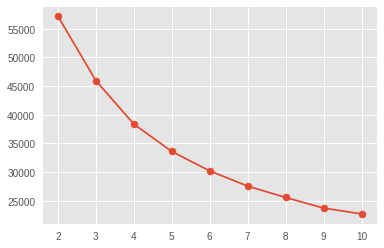

In [38]:
# Inertia vs. # of clusters
x1 = []
y1 = []
for n in range(2,11):
    km = KMeans(n_clusters=n, random_state=7)
    km.fit(X2_std)
    x1.append(n)
    y1.append(km.inertia_)
plt.scatter(x1, y1)
plt.plot(x1, y1);

- No clear "elbow" in the inertia graph in determining `k`.
- After trying out every `k` from 3 to 10, settled on `k = 7` that yielded cluster probability values with the most distinct split. (see below)

In [39]:
km = KMeans(n_clusters=7, n_init=20, random_state=7)
km.fit(X2_std)
columns = {str(x): stdsc2.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}
pd.DataFrame(columns, index=X2.columns)

,0,1,2,3,4,5,6
satisfaction_level,0.800510,0.418864,0.719596,0.157226,0.730666,0.632441,0.722155
time_spend_company,4.674549,3.059299,2.799443,4.255228,3.016859,7.647349,2.788147
number_project,4.560672,2.326146,3.675487,5.721402,4.148849,3.657213,3.522266
average_monthly_hours,244.263846,149.544474,242.528552,251.386839,160.866776,193.293465,190.363130
last_evaluation,0.901176,0.532892,0.636779,0.817146,0.613997,0.686178,0.884565


In [40]:
# Percentage of employees left for each cluster. Helps identify which cluster to direct our focus.
kmpredict = pd.DataFrame(data=df['left'])
kmpredict['cluster'] = km.labels_
kmpredict.groupby('cluster').mean()

,left
cluster,
0,0.549252
1,0.594917
2,0.024390
3,0.582411
4,0.017674
5,0.018496
6,0.022891


- There are 3 groups that have high probability of leaving: clusters 0, 1 and 3.
- Cluster 0: Their satisfaction level is high and they are a high performing bunch. The workload is in the higher end, but satisfaction level suggests they don't mind it. They are coming up on 5 years of service and possibly looking for different opportunities. This is the key group we need to focus on for retention.
- Cluster 1: Poor performing group (bottom quartile). Not very happy. Does not have many projects assigned to and working hours are short.
- Cluster 3: High performing, but overworked. Very disgruntled group. Need to reassign some of their projects to other groups (such as Cluster 6)

# Conclusions and Next Steps

- kNN and RF were great in accurately predicting, but did not provide interpretation of the results, which could help determine which employees would leave next. (RF provided feature importance scores.)
- Logistic Regression produces coefficients and probabilities, but performed poorly in predicting past employees leaving.
- K-means with 7 clusters identified 3 clusters that have high employee attrition (55-60% vs avg. of 24%) and 4 clusters of low attrition (1-3%). Identify what type of employees each cluster represents then take necessary actions to improve on employee retention.
- Some early recommendations (based on K-means clustering results)
  - Cluster 0 (Key focus): consider employees for promotion and new roles. They are satisfied, yet they are leaving to try different things.
  - Cluster 3 (overworked): reassign some of their projects to other groups (such as Clusters 6 - high performing but not as busy)
- Find out why employees left and confirm if the clusters make sense.
- Try k-means clustering on only the employees that have left and compare against the three clusters from above.
- Monitor performance of model as employee’s features change, their “cluster” may also change.